<a href="https://colab.research.google.com/github/Marzi125/Age_Prediction/blob/main/Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!git clone https://github.com/Marzi125/Age_Prediction

fatal: destination path 'Age_Prediction' already exists and is not an empty directory.


In [7]:
!pip install ktrain 

     |████████████████████████████████| 25.3 MB 65.7 MB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
     |████████████████████████████████| 981 kB 64.8 MB/s 
     |████████████████████████████████| 263 kB 41.8 MB/s 
     |████████████████████████████████| 2.8 MB 38.2 MB/s 
     |████████████████████████████████| 1.2 MB 45.2 MB/s 
     |████████████████████████████████| 468 kB 48.7 MB/s 
     |████████████████████████████████| 880 kB 48.8 MB/s 
     |████████████████████████████████| 596 kB 46.6 MB/s 
     |████████████████████████████████| 77 kB 5.7 MB/s 
     |████████████████████████████████| 3.3 MB 44.9 MB/s 
  Created wheel for ktrain: filename=ktrain-0.30.0-py3-none-any.whl size=25309161 sha256=ecb3f3c0156756f4781de84bd458f3e73ed2be50f649f2f07a48b8e7e38c9552
  Stored in directory: /root/.cache/pip/wheels/25/00/ae/80d1b19dd02bc2e6bc9bac32ba7dbaa59aad789e93274e4868
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33517 sha256=41efcae6

In [8]:
%matplotlib inline 
import os
import ktrain 
from ktrain import vision as vis 

In [9]:
import re 
pattern = r'([^/]+)_\d+_\d+_\d+.jpg$' 

p = re.compile(pattern)
r = p.search('10_0_0_21070110220546177.jpg')
print(r.group(1))

10


In [10]:
DATADIR = '/content/Age_Prediction'  


In [11]:
(train_data, test_data, preproc) = vis.images_from_fname(DATADIR, pattern = pattern,
                      is_regression = True,
                      random_state = 42) 

['label']
     label
265   27.0
54    23.0
732   20.0
621   19.0
97    23.0
['label']
     label
595   29.0
587   21.0
543   19.0
645    1.0
487   20.0
Found 702 validated image filenames.
Found 79 validated image filenames.


/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/Age_Prediction/28_1_0_20170117180707457 - Copy (2).jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/Age_Prediction/28_1_0_20170117202529215 - Copy.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/Age_Prediction/28_0_3_20170119194930475 - Copy (2).jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/Age_Prediction/28_0_3_20170119211740328 - Copy - Copy.jpg -

In [12]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized) [https://arxiv.org/abs/1512.03385]
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized) [https://arxiv.org/abs/1704.04861]
pretrained_mobilenetv3: MobileNetV3-Small Neural Network (pretrained on ImageNet)
mobilenetv3: MobileNetV3-Small Neural Network (randomly initialized) [https://arxiv.org/abs/1905.02244]
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized) [http://arxiv.org/abs/1512.00567]
pretrained_efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet)
efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet) [https://arxiv.org/abs/1905.11946]
pretrained_efficientnetb7: EfficientNet-B7 Neural Network (pretrained on ImageNet)
efficientnetb7: EfficientNet-B7 Neural Network (pre

In [13]:
model = vis.image_regression_model('pretrained_resnet50', train_data = train_data, val_data = test_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94781440/94765736 [==============================] - 0s 0us/step
pretrained_resnet50 model created.


In [14]:
learner = ktrain.get_learner(model= model, train_data=train_data, val_data=test_data, batch_size= 32)

In [15]:
#learning rate = 1e-4 

In [16]:
learner.fit_onecycle(1e-4, 5) 



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
22/22 [==============================] - 142s 6s/step - loss: 567.9891 - mae: 16.6949 - val_loss: 195.4155 - val_mae: 8.7892
Epoch 2/5
22/22 [==============================] - 129s 6s/step - loss: 291.2928 - mae: 9.1612 - val_loss: 163.7388 - val_mae: 7.9592
Epoch 3/5
22/22 [==============================] - 128s 6s/step - loss: 242.8370 - mae: 8.2145 - val_loss: 131.5779 - val_mae: 6.6121
Epoch 4/5
22/22 [==============================] - 136s 6s/step - loss: 196.3305 - mae: 7.3503 - val_loss: 121.7085 - val_mae: 6.2414
Epoch 5/5
22/22 [==============================] - 129s 6s/step - loss: 178.8649 - mae: 7.0999 - val_loss: 120.2828 - val_mae: 6.2663


In [17]:
learner.freeze(15)

learner.fit_onecycle(1e-4, 5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
22/22 [==============================] - 476s 21s/step - loss: 184.6094 - mae: 8.1139 - val_loss: 220.0158 - val_mae: 10.9775
Epoch 2/5
22/22 [==============================] - 470s 21s/step - loss: 40.6902 - mae: 4.5967 - val_loss: 149.3966 - val_mae: 7.6930
Epoch 3/5
22/22 [==============================] - 468s 21s/step - loss: 84.6838 - mae: 4.6769 - val_loss: 129.3507 - val_mae: 7.3874
Epoch 4/5
22/22 [==============================] - 471s 21s/step - loss: 68.8015 - mae: 4.6385 - val_loss: 131.3336 - val_mae: 7.3259
Epoch 5/5
22/22 [==============================] - 468s 21s/step - loss: 61.2341 - mae: 3.8857 - val_loss: 117.0989 - val_mae: 6.8765


In [18]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [19]:
test_data.filenames[1:20]

['21_0_0_20170110232137372.jpg',
 '19_1_2_20170104015921814.jpg',
 '1_0_0_20161219194756275.jpg',
 '20_1_4_20170103230550945.jpg',
 '25_0_0_20170117140927352.jpg',
 '23_0_0_20170117194041797.jpg',
 '15_1_0_20170109204314585.jpg',
 '18_1_1_20170109212540841.jpg',
 '14_1_0_20170109204200483.jpg',
 '29_1_0_20170103181430872.jpg',
 '11_1_0_20170109205247087.jpg',
 '26_1_0_20170117175343265.jpg',
 '24_0_0_20170116222146786.jpg',
 '24_0_0_20170116215611282.jpg',
 '26_0_3_20170119181430244.jpg',
 '21_0_4_20161223214831392.jpg',
 '20_1_4_20170103224354767.jpg',
 '22_1_2_20161219192416602.jpg',
 '30_1_0_20170117114710101.jpg']

In [20]:
def show_prediction(fname):
  fname = DATADIR + '/' + fname
  pred = round(predictor.predict_filename(fname)[0])
  actual = int(p.search(fname).group(1))
  vis.show_image(fname)
  print("Predicted Age: %s | Actual Age: %s" % (pred, actual))

Predicted Age: 14 | Actual Age: 15


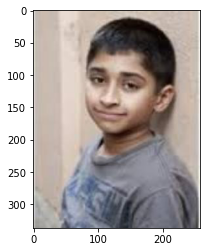

In [21]:
show_prediction('15_0_3_20170104225254497.jpg')

Predicted Age: 13 | Actual Age: 16


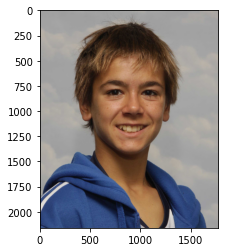

In [24]:
show_prediction('16_0_0_20170110225708208.jpg')

Predicted Age: 19 | Actual Age: 26


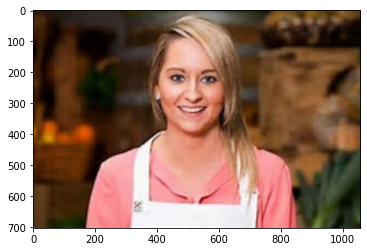

In [25]:
show_prediction('26_0_0_20170117152804731.jpg')

Predicted Age: 14 | Actual Age: 14


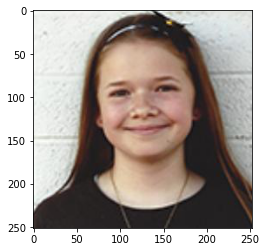

In [26]:
show_prediction('14_1_0_20170104011720664.jpg')

Predicted Age: 6 | Actual Age: 11


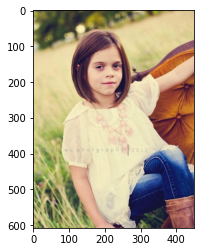

In [27]:
show_prediction('11_1_0_20170109204523092.jpg')

Predicted Age: 1 | Actual Age: 1


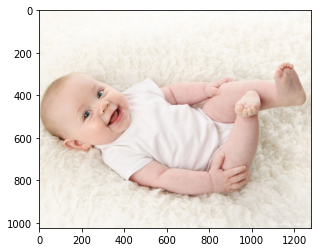

In [28]:
show_prediction('1_0_0_20170109193328570.jpg')